Clock 1: f=1000000 Hz, tick period=1.000 µs, alarm N=550000, trigger every 550000 µs
Clock 2: f=1000000 Hz, tick period=1.000 µs, alarm N=550000, trigger every 550000 µs


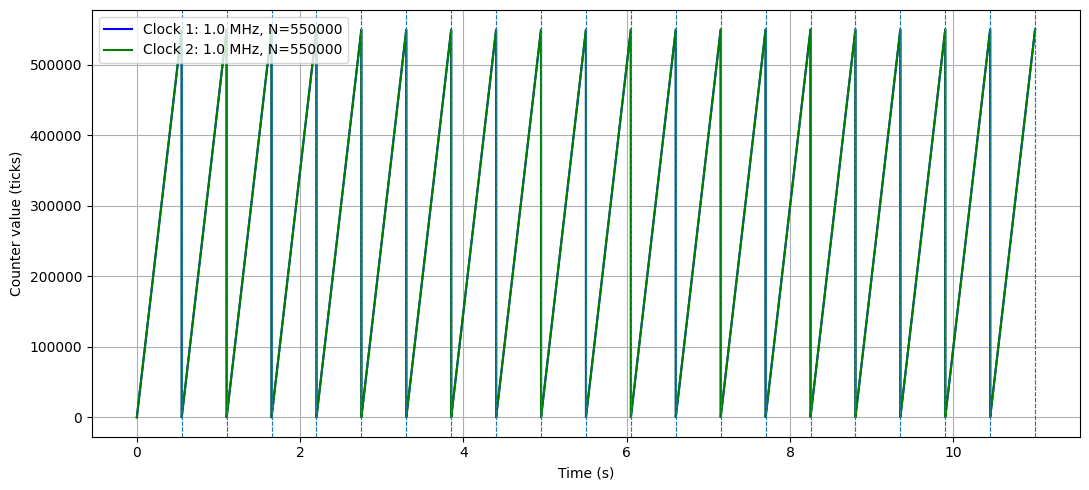

In [3]:
import numpy as np
import matplotlib.pyplot as plt

f1 = 1_000_000   # Clock 1 frequency (Hz)
f2 = 1_000_000   # Clock 2 frequency (Hz)

N1 = 550_000     # Alarm ticks for Clock 1
N2 = 550_000     # Alarm ticks for Clock 2

periods_to_show = 20

T1 = N1 / f1     # Trigger period for clock 1 (s)
T2 = N2 / f2     # Trigger period for clock 2 (s)
Tslow = max(T1, T2)
t_end = periods_to_show * Tslow

print(f"Clock 1: f={f1} Hz, tick period={1/f1*1e6:.3f} µs, alarm N={N1}, trigger every {T1*1e6:.0f} µs")
print(f"Clock 2: f={f2} Hz, tick period={1/f2*1e6:.3f} µs, alarm N={N2}, trigger every {T2*1e6:.0f} µs")

samples_per_cycle = 1000
n_points = max(2000, int(samples_per_cycle * periods_to_show))
t = np.linspace(0, t_end, n_points)

saw1 = N1 * ((t % T1) / T1)
saw2 = N2 * ((t % T2) / T2)

# Plot
plt.figure(figsize=(11, 5))
plt.plot(t , saw1, label=f"Clock 1: {f1/1e6:.1f} MHz, N={N1}", color='blue')
plt.plot(t , saw2, label=f"Clock 2: {f2/1e6:.1f} MHz, N={N2}", color = 'green')

# Vertical lines at each trigger instant for both clocks
for k in range(1, periods_to_show + 1):
    plt.axvline(k * T1, linestyle="--", linewidth=0.8)   # triggers for clock 1
    plt.axvline(k * T2, linestyle=":", linewidth=0.8)    # triggers for clock 2

plt.xlabel("Time (s)")
plt.ylabel("Counter value (ticks)")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
